## Sample code of linear regression with coursera training data

Author: hdup  
Email: [huangdan@youhujia.com](huangdan@youhujia.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models import linear_model, mse_cost, mse_cost_dev, gd_update

%matplotlib inline

## Uni-variable Linear Regression

### 1), prepare data

In [2]:
train_data = np.array(pd.read_csv('./data/ex1data1.txt', header=None))
train_X = train_data[:,0].reshape((train_data.shape[0], 1))
train_y = train_data[:,1].reshape((train_data.shape[0], 1))
feature_cnt = train_X.shape[1]
sample_cnt = train_X.shape[0]

### 2), define model 

In [3]:
def linear_model(X, W, b):
    return np.matmul(X ,W) + b

def mse_cost(h, y):
    diff = h - y
    return (diff * diff).sum() / (2 * y.shape[0])

def mse_cost_dev(X, y, h):
    diff = h - y
    return ((diff * X).sum() / X.shape[0]), (diff.sum() / X.shape[0])

def gd_update(X, y, h, W, b, cost_dev_func, lr=0.01):
    d_W, d_b = cost_dev_func(X, y, h)
    return (W - lr * d_W), (b - lr * d_b)

def create_parameters(feature_size):
    param_W = np.array([np.random.randn() for i in range(0, feature_size)]).reshape((feature_size, 1))
    param_b = np.random.randn()
    return param_W, param_b

def std_normalize(X):
    stds = np.std(X, axis=0)
    means = np.mean(X, axis=0)
    for col in range(0, X.shape[1]):
        X[:,col] = (X[:,col] - means[col]) / stds[col]
    return stds, means

def expand_feature_poly(X):
    expanded = np.ndarray((X.shape[0], 8), dtype=np.float32)
    expanded[:,0:2] = X[:,0:2]
    expanded[:,2] = X[:,0]**2
    expanded[:,3] = X[:,1]**2
    expanded[:,4] = X[:,0]**3
    expanded[:,5] = X[:,1]**3
    expanded[:,6] = X[:,0]*X[:,1]
    expanded[:,7] = X[:,2]
    return expanded

### 3), training 

epoch: 100, cost:5.325714942672207, W:[[ 0.88684662]], b:-0.8479563917401269
epoch: 200, cost:5.068619816879779, W:[[ 0.93739271]], b:-1.351098581888401
epoch: 300, cost:4.889402045685102, W:[[ 0.97959453]], b:-1.7711808502391595
epoch: 400, cost:4.764471596642206, W:[[ 1.01482957]], b:-2.1219149282752583
epoch: 500, cost:4.677384155513918, W:[[ 1.04424793]], b:-2.4147489818971506
epoch: 600, cost:4.616676598145987, W:[[ 1.06880983]], b:-2.6592412862685646
epoch: 700, cost:4.574358125197037, W:[[ 1.089317]], b:-2.8633722135207207
epoch: 800, cost:4.544858451179894, W:[[ 1.10643879]], b:-3.0338047167766296
epoch: 900, cost:4.524294600301639, W:[[ 1.12073408]], b:-3.1761018128467087
epoch: 1000, cost:4.509959799086636, W:[[ 1.13266946]], b:-3.2949081623584227
training finished!
final cost: 4.509840976690321, W: [[ 1.13266946]], b: -3.2949081623584227


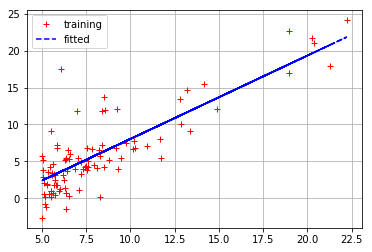

In [4]:
W, b = create_parameters(feature_cnt)

# batch learning
for epoch in range(0, 1000):
    h = linear_model(train_X, W, b)
    W, b = gd_update(train_X, train_y, h, W, b, mse_cost_dev, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}, W:{2}, b:{3}'.format(epoch + 1, cur_cost, W, b))

# finish
predictions = linear_model(train_X, W, b)
final_cost = mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}'.format(final_cost, W, b))

# then plot some curves
plt.plot(train_X, train_y, 'r+', label='training')
plt.plot(train_X, predictions, 'b--', label='fitted')
plt.grid(True)
plt.legend()
plt.show()

## Multi-variable Linear Regression

### 1), prepare data 

In [6]:
train_data = np.array(pd.read_csv('./data/ex1data2.txt', header=None), dtype=np.float32)
#train_data = expand_feature_poly(train_data)
std_normalize(train_data)

sample_cnt = train_data.shape[0]
feature_cnt = train_data.shape[1] - 1
train_X = train_data[:,0:feature_cnt].reshape((sample_cnt, feature_cnt))
train_y = train_data[:,feature_cnt:feature_cnt+1].reshape((sample_cnt, 1))

### 2), model has already been defined, let's start training

epoch: 100, cost:0.23433889821190618
epoch: 200, cost:0.15990368210759373
training finished!
final cost: 0.1596795919652835


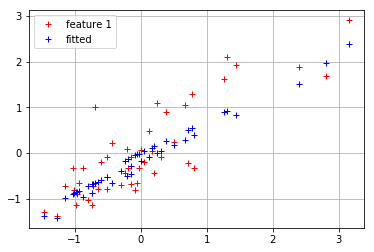

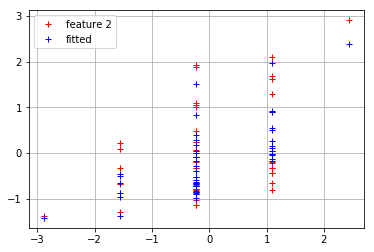

In [8]:
W, b = create_parameters(feature_cnt)

# batch learning
for epoch in range(0, 200):
    h = linear_model(train_X, W, b)
    W, b = gd_update(train_X, train_y, h, W, b, mse_cost_dev, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}'.format(epoch + 1, cur_cost))

# finish
predictions = linear_model(train_X, W, b)
final_cost = mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}'.format(final_cost))

# then plot some curves
plt.plot(train_X[:,0], train_y, 'r+', label='feature 1')
plt.plot(train_X[:,0], predictions, 'b+', label='fitted')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(train_X[:,1], train_y, 'r+', label='feature 2')
plt.plot(train_X[:,1], predictions, 'b+', label='fitted')
plt.grid(True)
plt.legend()
plt.show()